# Big Data Management Assignment 7: Comparison between libraries
### Group Name: Avengers
### Dataset: Amazon Book Reviews
### Date: 24th December, 2023
### Group Members

| Name                                     | Matrix Number |
| :---------------------------------------- | :-------------: |
| Ismail Maeen Fateh Allah Yaqot Alawami   |  MCS221028    |   
|LWANGA AKSAM              |  MCS231016    |
|BAKUNGA BRONSON             |   MCS232006   |  



# 1. Initial Setup

In [2]:
# Install necessary libraries
# !pip install pandas matplotlib seaborn vaex

In [3]:
# Import libraries
import vaex
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import time
import psutil
from datetime import datetime, timedelta

# 2. Data Loading

In [4]:
# Function to load data and measure time and memory
def load_data(file_path):
    start_time = time.time()
    start_memory = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
    
    df = vaex.read_csv(file_path, header='infer')
    
    end_memory = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
    end_time = time.time()
    
    print(f"Time to load: {end_time - start_time:.2f} seconds")
    print(f"Memory used: {end_memory - start_memory:.2f} MB")
    return df

# File paths of files
ratings_path = 'Books_rating.csv'
books_data_path = 'books_data.csv'

In [5]:
# Load the ratings dataset
ratings_df = load_data(ratings_path)

Time to load: 18.53 seconds
Memory used: 4115.19 MB


In [6]:
# Load the books_data dataset
books_data_df = load_data(books_data_path)

Time to load: 1.52 seconds
Memory used: 226.06 MB


## Book Dataset Exploration

In [7]:
%%time
# Show the first 10 rows
ratings_df.head(10)

CPU times: user 216 µs, sys: 25 µs, total: 241 µs
Wall time: 241 µs


#,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,nan,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4,940636800,Nice collection of Julie Strain images,"""This is only for Julie Strain fans. It's a coll..."
1,0826414346,Dr. Seuss: American Icon,nan,A30TK6U7DNS82R,Kevin Killian,10/10,5,1095724800,Really Enjoyed It,"""I don't care much for Dr. Seuss but after readi..."
2,0826414346,Dr. Seuss: American Icon,nan,A3UH4UZ4RSVO82,John Granger,10/11,5,1078790400,Essential for every personal and Public Library,"'If people become the books they read and if ""th..."
3,0826414346,Dr. Seuss: American Icon,nan,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4,1090713600,Phlip Nel gives silly Seuss a serious treatment,"'Theodore Seuss Geisel (1904-1991), aka &quot;Dr..."
4,0826414346,Dr. Seuss: American Icon,nan,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4,1107993600,Good academic overview,'Philip Nel - Dr. Seuss: American IconThis is ba...
5,0826414346,Dr. Seuss: American Icon,nan,A2F6NONFUDB6UK,Malvin,2/2,4,1127174400,One of America's greatest creative talents,"'""Dr. Seuss: American Icon"" by Philip Nel is a t..."
6,0826414346,Dr. Seuss: American Icon,nan,A14OJS0VWMOSWO,Midwest Book Review,3/4,5,1100131200,"""A memorably excellent survey of Dr. Seuss' many...","""Theodor Seuss Giesel was best known as 'Dr. Seu..."
7,0826414346,Dr. Seuss: American Icon,nan,A2RSSXTDZDUSH4,J. Squire,0/0,5,1231200000,Academia At It's Best,'When I recieved this book as a gift for Christm...
8,0826414346,Dr. Seuss: American Icon,nan,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0/0,5,1209859200,And to think that I read it on the tram!,'Trams (or any public transport) are not usually...
9,0826414346,Dr. Seuss: American Icon,nan,A3VA4XFS5WNJO3,Donald Burnside,3/5,4,1076371200,Fascinating account of a genius at work,"'As far as I am aware, this is the first book-le..."


In [8]:
%%time
# Get dataset information
ratings_df.info()

column,type,unit,description,expression
Id,str,,,
Title,str,,,
Price,float64,,,
User_id,str,,,
profileName,str,,,
review/helpfulness,str,,,
review/score,float64,,,
review/time,int64,,,
review/summary,str,,,
review/text,str,,,


CPU times: user 120 ms, sys: 30.1 ms, total: 150 ms
Wall time: 166 ms


In [9]:
%%time
# Show summary of the dataset
ratings_df.describe()

CPU times: user 974 ms, sys: 465 ms, total: 1.44 s
Wall time: 1.33 s


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
data_type,string,string,float64,string,string,string,float64,int64,string,string
count,3000000,2999792,481171,2438213,2438095,3000000,3000000,3000000,2999593,2999992
NA,0,208,2518829,561787,561905,0,0,0,407,8
mean,--,--,21.762655874933017,--,--,--,4.215289333333334,1132306772.630393,--,--
std,--,--,26.206513,--,--,--,1.203054,149320162.642545,--,--
min,--,--,1.0,--,--,--,1.0,-1,--,--
max,--,--,995.0,--,--,--,5.0,1362355200,--,--


In [10]:
%%time
# Get dataset shape
ratings_df.shape

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 16 µs


(3000000, 10)

In [11]:
%%time
# Check for missing values
missing_values_sums = {col: ratings_df[col].isna().sum() for col in ratings_df.column_names}

# To print the sum of missing values for each column
for col, sum_of_missing in missing_values_sums.items():
    print(f"{col}: {sum_of_missing}")

Id: 0
Title: 208
Price: 2518829
User_id: 561787
profileName: 561905
review/helpfulness: 0
review/score: 0
review/time: 0
review/summary: 407
review/text: 8
CPU times: user 821 ms, sys: 482 ms, total: 1.3 s
Wall time: 1.47 s


In [12]:
%%time
# Fill missing Prices with 0 as they are too many to drop
ratings_df['Price'] = ratings_df['Price'].fillna(0)

CPU times: user 566 µs, sys: 152 µs, total: 718 µs
Wall time: 723 µs


In [13]:
%%time 
# Define the columns for which you want to drop missing values
columns_to_check = ['Title', 'User_id', 'profileName', 'review/summary', 'review/text']

# Create a boolean expression for each column where True indicates a non-missing value
expressions = [ratings_df[col].notna() for col in columns_to_check]

# Combine the boolean expressions with logical AND to create a mask
mask = expressions[0]
for expr in expressions[1:]:
    mask &= expr

# Apply the mask to the dataframe to filter out rows with any missing values in these columns
ratings_df = ratings_df[mask]

CPU times: user 2.56 ms, sys: 995 µs, total: 3.56 ms
Wall time: 3.19 ms


In [14]:
%%time
# Check for missing values
missing_values_sums = {col: ratings_df[col].isna().sum() for col in ratings_df.column_names}

# To print the sum of missing values for each column
for col, sum_of_missing in missing_values_sums.items():
    print(f"{col}: {sum_of_missing}")

Id: 0
Title: 0
Price: 0
__Price: 2022988
User_id: 0
profileName: 0
review/helpfulness: 0
review/score: 0
review/time: 0
review/summary: 0
review/text: 0
CPU times: user 7.4 s, sys: 4.74 s, total: 12.1 s
Wall time: 12 s


## Book Data Dataset Exploration

In [15]:
%%time
# Show the first 10 rows
books_data_df.head(10)

CPU times: user 256 µs, sys: 86 µs, total: 342 µs
Wall time: 311 µs


#,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,--,['Julie Strain'],'http://books.google.com/books/content?id=DykPAA...,'http://books.google.nl/books?id=DykPAAAACAAJ&dq...,--,1996,'http://books.google.nl/books?id=DykPAAAACAAJ&dq...,['Comics & Graphic Novels'],nan
1,Dr. Seuss: American Icon,'Philip Nel takes a fascinating look into the ke...,['Philip Nel'],'http://books.google.com/books/content?id=IjvHQs...,'http://books.google.nl/books?id=IjvHQsCn_pgC&pr...,A&C Black,2005-01-01,'http://books.google.nl/books?id=IjvHQsCn_pgC&dq...,['Biography & Autobiography'],nan
2,Wonderful Worship in Smaller Churches,'This resource includes twelve principles in und...,['David R. Ray'],'http://books.google.com/books/content?id=2tsDAA...,'http://books.google.nl/books?id=2tsDAAAACAAJ&dq...,--,2000,'http://books.google.nl/books?id=2tsDAAAACAAJ&dq...,['Religion'],nan
3,Whispers of the Wicked Saints,'Julia Thomas finds her life spinning out of con...,['Veronica Haddon'],'http://books.google.com/books/content?id=aRSIgJ...,'http://books.google.nl/books?id=aRSIgJlq6JwC&dq...,iUniverse,2005-02,'http://books.google.nl/books?id=aRSIgJlq6JwC&dq...,['Fiction'],nan
4,"'Nation Dance: Religion, Identity and Cultural D...",--,['Edward Long'],--,'http://books.google.nl/books?id=399SPgAACAAJ&dq...,--,2003-03-01,'http://books.google.nl/books?id=399SPgAACAAJ&dq...,--,nan
5,'The Church of Christ: A Biblical Ecclesiology f...,'In The Church of Christ: A Biblical Ecclesiolog...,['Everett Ferguson'],'http://books.google.com/books/content?id=kVqRai...,'http://books.google.nl/books?id=kVqRaiPlx88C&pr...,Wm. B. Eerdmans Publishing,1996,'http://books.google.nl/books?id=kVqRaiPlx88C&dq...,['Religion'],5
6,The Overbury affair (Avon),--,['Miriam Allen De Ford'],--,'http://books.google.nl/books?id=mHLTngEACAAJ&dq...,--,1960,'http://books.google.nl/books?id=mHLTngEACAAJ&dq...,--,nan
7,A Walk in the Woods: a Play in Two Acts,--,['Lee Blessing'],--,'http://books.google.nl/books?id=6HDOwAEACAAJ&dq...,--,1988,'http://books.google.nl/books?id=6HDOwAEACAAJ&dq...,--,3
8,Saint Hyacinth of Poland,'The story for children 10 and up of St. Hyacint...,['Mary Fabyan Windeatt'],'http://books.google.com/books/content?id=lmLqAA...,'http://books.google.nl/books?id=lmLqAAAACAAJ&dq...,Tan Books & Pub,2009-01-01,'http://books.google.nl/books?id=lmLqAAAACAAJ&dq...,['Biography & Autobiography'],nan
9,"""Rising Sons and Daughters: Life Among Japan's N...",'Wardell recalls his experience as a foreign stu...,['Steven Wardell'],--,'http://books.google.nl/books?id=rbLZugEACAAJ&dq...,Plympton PressIntl,1995,'http://books.google.nl/books?id=rbLZugEACAAJ&dq...,['Social Science'],nan


In [16]:
%%time
# Get dataset information
books_data_df.info()

column,type,unit,description,expression
Title,str,,,
description,str,,,
authors,str,,,
image,str,,,
previewLink,str,,,
publisher,str,,,
publishedDate,str,,,
infoLink,str,,,
categories,str,,,
ratingsCount,float64,,,


CPU times: user 5.09 ms, sys: 1.55 ms, total: 6.63 ms
Wall time: 11.4 ms


In [17]:
%%time
# Show summary of the dataset
books_data_df.describe()

CPU times: user 116 ms, sys: 42.4 ms, total: 158 ms
Wall time: 162 ms


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
data_type,string,string,string,string,string,string,string,string,string,float64
count,212403,143962,180991,160329,188568,136518,187099,188568,171205,49752
NA,1,68442,31413,52075,23836,75886,25305,23836,41199,162652
mean,--,--,--,--,--,--,--,--,--,21.25297475478373
std,--,--,--,--,--,--,--,--,--,201.338407
min,--,--,--,--,--,--,--,--,--,1.0
max,--,--,--,--,--,--,--,--,--,4895.0


In [18]:
%%time
# Get dataset shape
books_data_df.shape

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 11.9 µs


(212404, 10)

In [19]:
%%time
# Check for missing values
missing_values_sums = {col: books_data_df[col].isna().sum() for col in books_data_df.column_names}

# To print the sum of missing values for each column
for col, sum_of_missing in missing_values_sums.items():
    print(f"{col}: {sum_of_missing}")

Title: 1
description: 68442
authors: 31413
image: 52075
previewLink: 23836
publisher: 75886
publishedDate: 25305
infoLink: 23836
categories: 41199
ratingsCount: 162652
CPU times: user 103 ms, sys: 10.8 ms, total: 113 ms
Wall time: 102 ms


In [20]:
%%time
# Fill missing ratingsCount with 0 as they are too many to drop
books_data_df['ratingsCount'] = books_data_df['ratingsCount'].fillna(0)

CPU times: user 352 µs, sys: 6 µs, total: 358 µs
Wall time: 358 µs


In [21]:
%%time 
# Define the columns for which you want to drop missing values
columns_to_check = ['Title','description', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories']

# Create a boolean expression for each column where True indicates a non-missing value
expressions = [books_data_df[col].notna() for col in columns_to_check]

# Combine the boolean expressions with logical AND to create a mask
mask = expressions[0]
for expr in expressions[1:]:
    mask &= expr

# Apply the mask to the dataframe to filter out rows with any missing values in these columns
books_data_df = books_data_df[mask]

CPU times: user 4.25 ms, sys: 1.04 ms, total: 5.29 ms
Wall time: 4.74 ms


In [22]:
%%time
# Check for missing values
missing_values_sums = {col: books_data_df[col].isna().sum() for col in books_data_df.column_names}

# To print the sum of missing values for each column
for col, sum_of_missing in missing_values_sums.items():
    print(f"{col}: {sum_of_missing}")

Title: 0
description: 0
authors: 0
image: 0
previewLink: 0
publisher: 0
publishedDate: 0
infoLink: 0
categories: 0
ratingsCount: 0
__ratingsCount: 77383
CPU times: user 823 ms, sys: 49.6 ms, total: 873 ms
Wall time: 819 ms


# 3. Data Merging

In [23]:
%%time
# Merging datasets on a common key
merged_df = ratings_df.join(books_data_df, on='Title', how='inner')

CPU times: user 885 ms, sys: 369 ms, total: 1.25 s
Wall time: 1.11 s


## Initial Merged Dataset Exploration

In [24]:
%%time
# Load the first 5 rows
merged_df.head(10)

CPU times: user 1.74 s, sys: 1.26 s, total: 3 s
Wall time: 3.15 s


#,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,0826414346,Dr. Seuss: American Icon,0,A30TK6U7DNS82R,Kevin Killian,10/10,5,1095724800,Really Enjoyed It,"""I don't care much for Dr. Seuss but after readi...",'Philip Nel takes a fascinating look into the ke...,['Philip Nel'],'http://books.google.com/books/content?id=IjvHQs...,'http://books.google.nl/books?id=IjvHQsCn_pgC&pr...,A&C Black,2005-01-01,'http://books.google.nl/books?id=IjvHQsCn_pgC&dq...,['Biography & Autobiography'],0
1,0826414346,Dr. Seuss: American Icon,0,A3UH4UZ4RSVO82,John Granger,10/11,5,1078790400,Essential for every personal and Public Library,"'If people become the books they read and if ""th...",'Philip Nel takes a fascinating look into the ke...,['Philip Nel'],'http://books.google.com/books/content?id=IjvHQs...,'http://books.google.nl/books?id=IjvHQsCn_pgC&pr...,A&C Black,2005-01-01,'http://books.google.nl/books?id=IjvHQsCn_pgC&dq...,['Biography & Autobiography'],0
2,0826414346,Dr. Seuss: American Icon,0,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4,1090713600,Phlip Nel gives silly Seuss a serious treatment,"'Theodore Seuss Geisel (1904-1991), aka &quot;Dr...",'Philip Nel takes a fascinating look into the ke...,['Philip Nel'],'http://books.google.com/books/content?id=IjvHQs...,'http://books.google.nl/books?id=IjvHQsCn_pgC&pr...,A&C Black,2005-01-01,'http://books.google.nl/books?id=IjvHQsCn_pgC&dq...,['Biography & Autobiography'],0
3,0826414346,Dr. Seuss: American Icon,0,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4,1107993600,Good academic overview,'Philip Nel - Dr. Seuss: American IconThis is ba...,'Philip Nel takes a fascinating look into the ke...,['Philip Nel'],'http://books.google.com/books/content?id=IjvHQs...,'http://books.google.nl/books?id=IjvHQsCn_pgC&pr...,A&C Black,2005-01-01,'http://books.google.nl/books?id=IjvHQsCn_pgC&dq...,['Biography & Autobiography'],0
4,0826414346,Dr. Seuss: American Icon,0,A2F6NONFUDB6UK,Malvin,2/2,4,1127174400,One of America's greatest creative talents,"'""Dr. Seuss: American Icon"" by Philip Nel is a t...",'Philip Nel takes a fascinating look into the ke...,['Philip Nel'],'http://books.google.com/books/content?id=IjvHQs...,'http://books.google.nl/books?id=IjvHQsCn_pgC&pr...,A&C Black,2005-01-01,'http://books.google.nl/books?id=IjvHQsCn_pgC&dq...,['Biography & Autobiography'],0
5,0826414346,Dr. Seuss: American Icon,0,A14OJS0VWMOSWO,Midwest Book Review,3/4,5,1100131200,"""A memorably excellent survey of Dr. Seuss' many...","""Theodor Seuss Giesel was best known as 'Dr. Seu...",'Philip Nel takes a fascinating look into the ke...,['Philip Nel'],'http://books.google.com/books/content?id=IjvHQs...,'http://books.google.nl/books?id=IjvHQsCn_pgC&pr...,A&C Black,2005-01-01,'http://books.google.nl/books?id=IjvHQsCn_pgC&dq...,['Biography & Autobiography'],0
6,0826414346,Dr. Seuss: American Icon,0,A2RSSXTDZDUSH4,J. Squire,0/0,5,1231200000,Academia At It's Best,'When I recieved this book as a gift for Christm...,'Philip Nel takes a fascinating look into the ke...,['Philip Nel'],'http://books.google.com/books/content?id=IjvHQs...,'http://books.google.nl/books?id=IjvHQsCn_pgC&pr...,A&C Black,2005-01-01,'http://books.google.nl/books?id=IjvHQsCn_pgC&dq...,['Biography & Autobiography'],0
7,0826414346,Dr. Seuss: American Icon,0,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0/0,5,1209859200,And to think that I read it on the tram!,'Trams (or any public transport) are not usually...,'Philip Nel takes a fascinating look into the ke...,['Philip Nel'],'http://books.google.com/books/content?id=IjvHQs...,'http://books.google.nl/books?id=IjvHQsCn_pgC&pr...,A&C Black,2005-01-01,'http://books.google.nl/books?id=IjvHQsCn_pgC&dq...,['Biography & Autobiography'],0
8,0826414346,Dr. Seuss: American Icon,0,A3VA4XFS5WNJO3,Donald Burnside,3/5,4,1076371200,Fascinating account of 

In [25]:
%%time
# Get dataset information
merged_df.info()

column,type,unit,description,expression
Id,str,,,
Title,str,,,
Price,virtual column,,,"fillna(__Price, 0)"
User_id,str,,,
profileName,str,,,
review/helpfulness,str,,,
review/score,float64,,,
review/time,int64,,,
review/summary,str,,,
review/text,str,,,


CPU times: user 20.1 ms, sys: 1.2 ms, total: 21.3 ms
Wall time: 20.8 ms


In [26]:
%%time
# Show summary of the dataset
merged_df.describe()

CPU times: user 18.7 s, sys: 12.9 s, total: 31.6 s
Wall time: 32 s


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
data_type,string,string,float64,string,string,string,float64,int64,string,string,string,string,string,string,string,string,string,string,float64
count,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507,1652507
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,--,--,3.7453947123974083,--,--,--,4.217291061399437,1167675733.3384905,--,--,--,--,--,--,--,--,--,--,196.52612303609
std,--,--,13.04828,--,--,--,1.185341,134933980.218107,--,--,--,--,--,--,--,--,--,--,695.068748
min,--,--,0.0,--,--,--,1.0,-1,--,--,--,--,--,--,--,--,--,--,0.0
max,--,--,890.0,--,--,--,5.0,1362355200,--,--,--,--,--,--,--,--,--,--,4895.0


In [27]:
%%time
# Get dataset shape
merged_df.shape

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 11 µs


(1652507, 19)

# 4. Data Cleaning and Preprocessing

In [28]:
%%time
# Check for missing values
missing_values_sums = {col: merged_df[col].isna().sum() for col in merged_df.column_names}

# To print the sum of missing values for each column
for col, sum_of_missing in missing_values_sums.items():
    print(f"{col}: {sum_of_missing}")

Id: 0
Title: 0
Price: 0
__Price: 1354496
User_id: 0
profileName: 0
review/helpfulness: 0
review/score: 0
review/time: 0
review/summary: 0
review/text: 0
description: 0
authors: 0
image: 0
previewLink: 0
publisher: 0
publishedDate: 0
infoLink: 0
categories: 0
ratingsCount: 0
__ratingsCount: 528554
CPU times: user 20.3 s, sys: 14.3 s, total: 34.6 s
Wall time: 35.1 s


In [29]:
%%time
# Check for missing values
missing_values_sums = {col: merged_df[col].ismissing().sum() for col in merged_df.column_names}

# To print the sum of missing values for each column
for col, sum_of_missing in missing_values_sums.items():
    print(f"{col}: {sum_of_missing}")

Id: 0
Title: 0
Price: 0
__Price: 0
User_id: 0
profileName: 0
review/helpfulness: 0
review/score: 0
review/time: 0
review/summary: 0
review/text: 0
description: 0
authors: 0
image: 0
previewLink: 0
publisher: 0
publishedDate: 0
infoLink: 0
categories: 0
ratingsCount: 0
__ratingsCount: 0
CPU times: user 20.5 s, sys: 14.5 s, total: 35 s
Wall time: 35.4 s


In [30]:
%%time
# Converting data types

# Define a function to convert Unix timestamps to datetime objects
def convert_unix_to_datetime(unixtime):
    return datetime(1970, 1, 1) + timedelta(seconds=unixtime)

# Now apply the function to the column
merged_df['reviewTime'] = merged_df.apply(convert_unix_to_datetime, arguments=[merged_df['review/time']])

# For converting types, you typically only need to do this for numerical columns in Vaex
# For categories, if your 'publisher' and 'categories' columns are strings and you want to optimize them:
# Vaex will automatically use its string handling which is memory efficient, similar to 'category' in pandas.

# Convert to 'float32' for float columns
float_columns = ['Price', 'review/score', 'ratingsCount']
for col in float_columns:
    merged_df[col] = merged_df[col].astype('float32')

CPU times: user 2.21 ms, sys: 205 µs, total: 2.41 ms
Wall time: 2.23 ms


In [31]:
%%time
# Handling duplicates
# Omitted

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


# More Merged Dataset Exploration

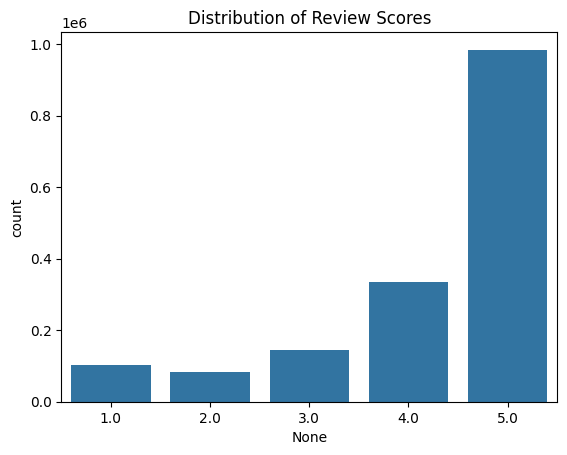

CPU times: user 3.64 s, sys: 1.5 s, total: 5.14 s
Wall time: 4.53 s


In [32]:
%%time
# Convert the Vaex column to a numpy array
review_scores_array = merged_df['review/score'].values

# Now create a pandas Series from the numpy array
review_scores_series = pd.Series(review_scores_array)

# Use seaborn to plot the countplot with the pandas Series
sns.countplot(x=review_scores_series)
plt.title('Distribution of Review Scores')
plt.show()

# 5. Detailed Exploratory Data Analysis

## Ratings Analysis

Top 5 Average Scores:
  #  Title                                             average_score
  0  Lanterns: A Memoir of Mentors                                 5
  1  Air Fare: Stories, Poems, and Essays on Flight                5
  2  Voices From the Earth: Practical Shamanism                    5
  3  The Cruelest Months                                           5
  4  Twentieth Century Pleasures: Prose on Poetry                  5


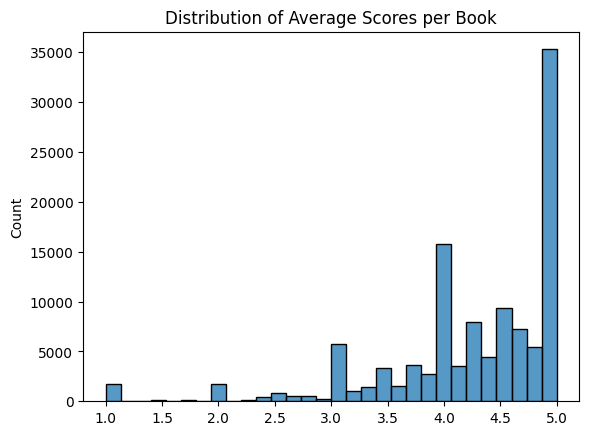

CPU times: user 2.49 s, sys: 2.31 s, total: 4.8 s
Wall time: 3.47 s


In [33]:
%%time
# Calculate average scores per book
average_scores_df = merged_df.groupby('Title', agg={'average_score': vaex.agg.mean('review/score')})

# Convert the result to a NumPy array
average_scores_array = average_scores_df['average_score'].to_numpy()

# Print the top 5 average scores
print("Top 5 Average Scores:")
print(average_scores_df.sort('average_score', ascending=False).head(5))

# Distribution of average scores
sns.histplot(average_scores_array, bins=30, kde=False)
plt.title('Distribution of Average Scores per Book')
plt.show()

## Review Counts Analysis

The Hobbit                                                          18227
Pride and Prejudice                                                 17959
Great Expectations                                                   5675
Mere Christianity                                                    5527
Brave New World                                                      5136
The Great Gatsby                                                     4302
The Giver                                                            3854
Harry Potter and The Sorcerer's Stone                                3748
The Hobbitt, or there and back again; illustrated by the author.     3663
The Hobbit or There and Back Again                                   3615
dtype: int64


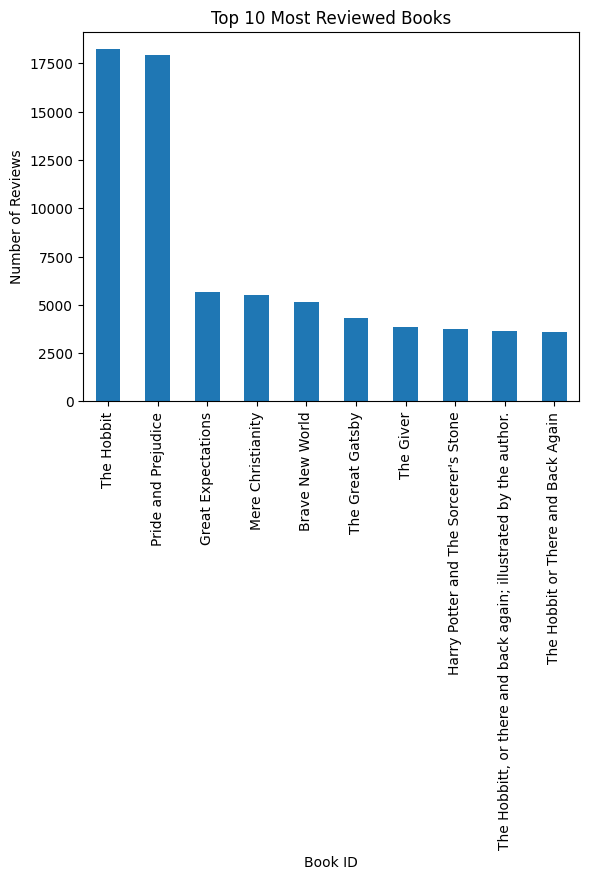

CPU times: user 1.7 s, sys: 650 ms, total: 2.35 s
Wall time: 1.73 s


In [34]:
%%time
# Books with the most reviews
most_reviewed_books = merged_df['Title'].value_counts().head(10)
print(most_reviewed_books)

# Visualizing the most reviewed books
most_reviewed_books.plot(kind='bar')
plt.title('Top 10 Most Reviewed Books')
plt.xlabel('Book ID')
plt.ylabel('Number of Reviews')
plt.show()

## Temporal Analysis

### NOTE: Vaex fails to group this data

# 6. Visualizations

## Word Cloud for Review Texts

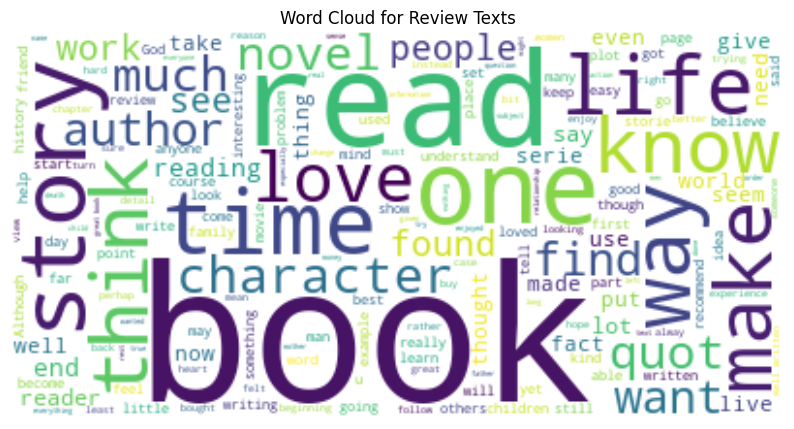

CPU times: user 4min 9s, sys: 2min 51s, total: 7min 1s
Wall time: 8min 54s


In [35]:
%%time
from wordcloud import WordCloud

# Since Vaex doesn't support certain operations that WordCloud expects, 
# we convert the Vaex column to a list.
text = ' '.join(merged_df['review/text'].to_numpy().tolist())

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Texts')
plt.show()

## Correlation Analysis

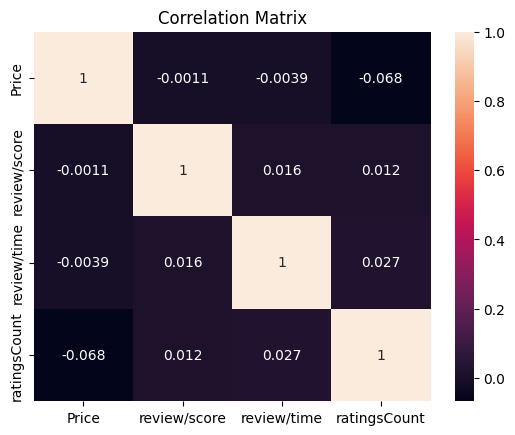

CPU times: user 2.55 s, sys: 3.11 s, total: 5.66 s
Wall time: 13.3 s


In [36]:
%%time
# Identify numeric columns by checking the data type of each column
numeric_cols = ['Price', 'review/score', 'review/time', 'ratingsCount']

# Select only the numeric columns from the DataFrame
numeric_df = merged_df[numeric_cols]

# Since Vaex doesn't calculate correlation matrices directly, you will need to convert to a pandas DataFrame
numeric_df = numeric_df.to_pandas_df()

# Calculate the correlation matrix using pandas
correlations = numeric_df.corr()

# Use seaborn to create a heatmap of the correlations
sns.heatmap(correlations, annot=True)
plt.title('Correlation Matrix')
plt.show()

## Category Analysis

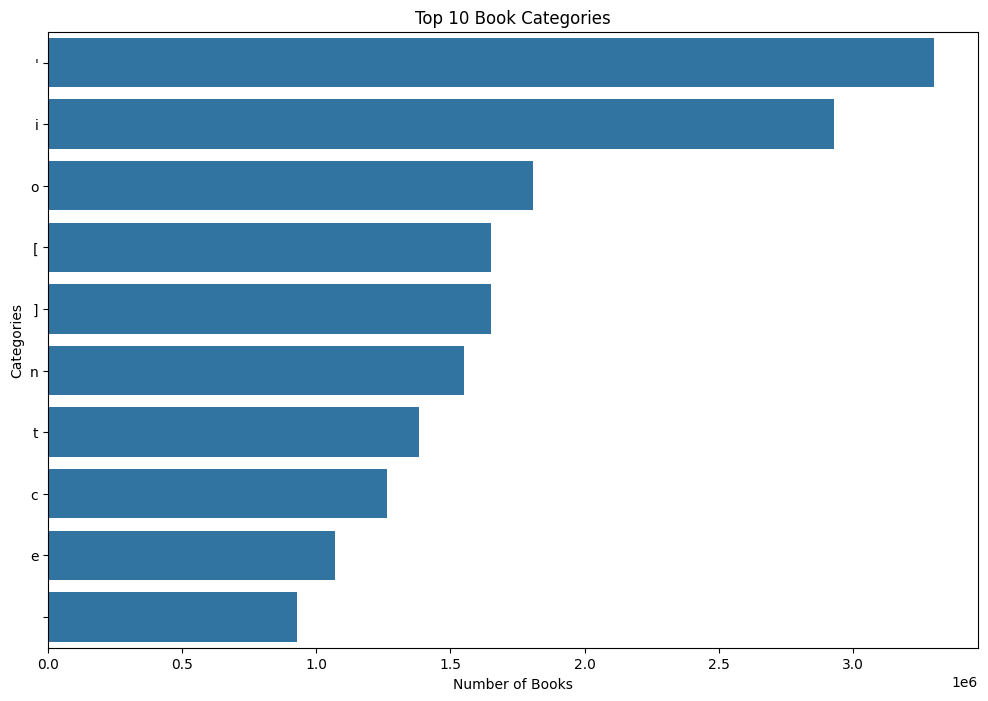

CPU times: user 3.86 s, sys: 1.44 s, total: 5.3 s
Wall time: 5.06 s


In [37]:
%%time
# Flatten the list of categories into a single list
# Convert the column of lists into a list of lists
categories_list_of_lists = merged_df['categories'].dropmissing().tolist()

# Flatten the list of lists into a single list
all_categories = [category for sublist in categories_list_of_lists for category in sublist]

# Now we can safely count occurrences since all items are strings
category_counts = pd.Series(all_categories).value_counts().head(10)

# Plotting the top 10 categories
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Book Categories')
plt.xlabel('Number of Books')
plt.ylabel('Categories')
plt.show()

# 7. Deep Dive into Specific Questions

## Highest-Rated Books

In [38]:
%%time
# Identifying highest-rated books with a significant number of reviews
min_reviews = 50

# Group by 'Title' and calculate the count and mean of 'review/score'
agg = merged_df.groupby('Title', 
                        agg={'review_score_mean': vaex.agg.mean('review/score'), 
                             'review_count': vaex.agg.count('review/score')})

# Filter out the groups with less than the minimum number of reviews
top_rated_books = agg[agg['review_count'] >= min_reviews]

# Sort by mean review score in descending order and take the top 10
top_rated_books = top_rated_books.sort('review_score_mean', ascending=False).head(10)

# Execute the expressions and get the result as a Pandas DataFrame (for pretty printing)
top_rated_books = top_rated_books.to_pandas_df()

print("Top Rated Books:")
print(top_rated_books)

Top Rated Books:
                                               Title  review_score_mean  \
0                      Lilla Belle: The First Stages           5.000000   
1                                     the lion's paw           4.976471   
2                               Why revival tarries,           4.967213   
3                                Why Revival Tarries           4.967213   
4  The Wealthy Spirit: Daily Affirmations for Fin...           4.967033   
5                                Why revival tarries           4.966851   
6                                     Life of Christ           4.955882   
7                                     Shadow castle,           4.954545   
8                                      shadow castle           4.954545   
9                        Last of the Donkey Pilgrims           4.948276   

   review_count  
0           106  
1            85  
2            61  
3            61  
4            91  
5           181  
6            68  
7            

## Impact of Price on Ratings

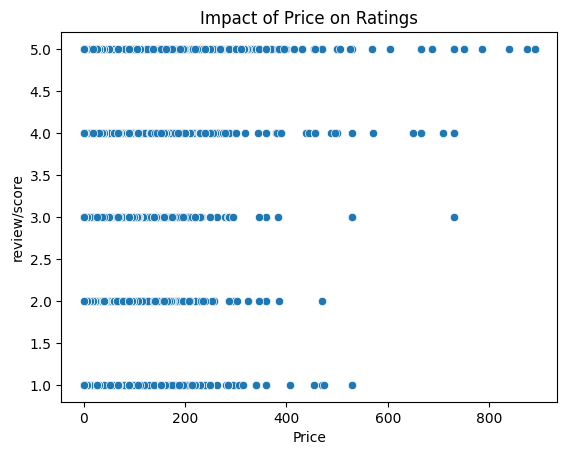

CPU times: user 3.4 s, sys: 1.38 s, total: 4.78 s
Wall time: 4.42 s


In [39]:
%%time
# Convert the required columns to a Pandas DataFrame
pdf = merged_df[['Price', 'review/score']].to_pandas_df()

# Now you can use Seaborn's scatterplot function with the Pandas DataFrame
sns.scatterplot(x='Price', y='review/score', data=pdf)
plt.title('Impact of Price on Ratings')
plt.show()

## Length of Review vs Helpfulness

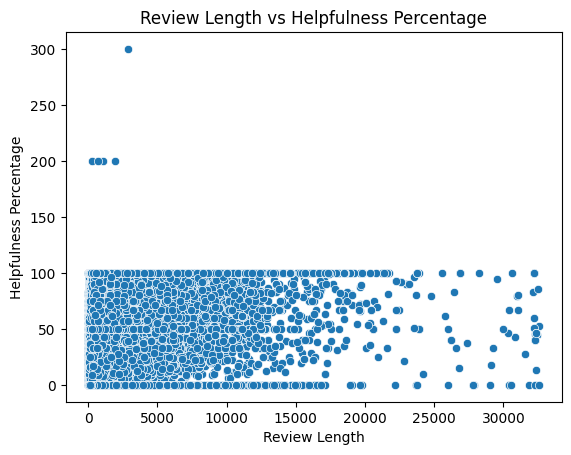

CPU times: user 5.81 s, sys: 1.96 s, total: 7.76 s
Wall time: 7.6 s


In [40]:
%%time
def helpfulness_percentage(helpfulness):
    if helpfulness is not None and '/' in helpfulness:
        helpful, total = helpfulness.split('/')
        # Avoid division by zero
        if int(total) == 0:
            return 0
        return (int(helpful) / int(total)) * 100
    else:
        return None

# Apply the function to the 'review/helpfulness' column using vaex apply
merged_df['helpfulness_percent'] = merged_df['review/helpfulness'].apply(helpfulness_percentage)

# Create a new column for review_length in the Vaex DataFrame
merged_df['review_length'] = merged_df['review/text'].str.len()

# Now convert the necessary columns to a Pandas DataFrame
# Make sure the DataFrame size is manageable for your system's memory
pdf = merged_df[['review_length', 'helpfulness_percent']].to_pandas_df()

# Plotting review_length against helpfulness percentage using the Pandas DataFrame
sns.scatterplot(x='review_length', y='helpfulness_percent', data=pdf)
plt.title('Review Length vs Helpfulness Percentage')
plt.xlabel('Review Length')
plt.ylabel('Helpfulness Percentage')
plt.show()

In [41]:
%%time
# Filter rows where 'helpfulness_percent' is greater than 100
outliers = merged_df[merged_df.helpfulness_percent > 100]

# If you want to see the results as a Pandas DataFrame
outliers_df = outliers.to_pandas_df()
print(outliers_df)

           Id                                              Title  Price  \
0  1930771142  You Can Have Your Cheese and Eat It Too!: A Co...   0.00   
1  B000FGGLCK  Automatic Wealth: The Six Steps to Financial I...   2.99   
2  0743507770     How to Practice : The Way to a Meaningful Life   0.00   
3  B000HZ9A2W                              Cold Mountain A Novel   0.00   
4  0375728198                                   Bend in the Road   0.00   

          User_id                                  profileName  \
0  A1VYC3XNQU72RF                           William Cottringer   
1  A3GJYJFNNEFO0C   Mollie Marti "Founder of Best Life Design"   
2   A18ZOHJ7ZERQ8  Miz Ellen "all the letters of my real name"   
3  A192Y4FFG95HZI                                    S. Annand   
4  A3IIE48J2TCHOW          Angela M. Hooper "Angela M. Hooper"   

  review/helpfulness  review/score  review/time  \
0                2/1           5.0   1008892800   
1                2/1           5.0   1190073600   

Process SpawnPoolWorker-9:
Process SpawnPoolWorker-7:
Process SpawnPoolWorker-6:
Process SpawnPoolWorker-8:
Process SpawnPoolWorker-5:
Process SpawnPoolWorker-4:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-1:
Process SpawnPoolWorker-2:
Process SpawnPoolWorker-10:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/synchronize.py", l

# 8. Performance Metrics

## Memory Usage Analysis

The ratings dataset consumed approximately 4115.19 MB and the books data took up 226.06 MB. This suggests that initial data loading is a significant memory operation in Vaex, similar to Modin with Ray.

## Timing Metrics Analysis

| Operation | User Time (s) | System Time (s) | Total CPU Time (s) | Wall Time (s) |
|-----------|---------------|-----------------|--------------------|---------------|
| Load Data (Ratings) | 0.0 | 0.0 | 18.53 | - |
| Load Data (Books) | 0.0 | 0.0 | 1.52 | - |
| Head (Ratings) | 0.000216 | 0.000025 | 0.000241 | 0.000241 |
| Info (Ratings) | 0.12 | 0.0301 | 0.15 | 0.166 |
| Describe (Ratings) | 0.974 | 0.465 | 1.44 | 1.33 |
| Shape (Ratings) | 0.000012 | 0.000001 | 0.000013 | 0.000016 |
| Missing Values (Ratings) | 0.821 | 0.482 | 1.3 | 1.47 |
| Fill Missing Prices | 0.000566 | 0.000152 | 0.000718 | 0.000723 |
| Drop NA (Ratings) | 0.00256 | 0.000995 | 0.00356 | 0.00319 |
| Missing Values (Post-Drop NA) | 7.4 | 4.74 | 12.1 | 12.0 |
| Head (Books Data) | 0.000256 | 0.000086 | 0.000342 | 0.000311 |
| Info (Books Data) | 0.00509 | 0.00155 | 0.00663 | 0.0114 |
| Describe (Books Data) | 0.116 | 0.0424 | 0.158 | 0.162 |
| Shape (Books Data) | 0.00001 | 0.0 | 0.00001 | 0.0000119 |
| Missing Values (Books Data) | 0.103 | 0.0108 | 0.113 | 0.102 |
| Fill Missing RatingsCount | 0.000352 | 0.000006 | 0.000358 | 0.000358 |
| Drop NA (Books Data) | 0.00425 | 0.00104 | 0.00529 | 0.00474 |
| Missing Values (Post-Drop NA Books Data) | 0.823 | 0.0496 | 0.873 | 0.819 |
| Merge Datasets | 0.885 | 0.369 | 1.25 | 1.11 |
| Head (Merged) | 1.74 | 1.26 | 3.0 | 3.15 |
| Info (Merged) | 0.0201 | 0.0012 | 0.0213 | 0.0208 |
| Describe (Merged) | 18.7 | 12.9 | 31.6 | 32.0 |
| Shape (Merged) | 0.00001 | 0.0 | 0.00001 | 0.000011 |
| Missing Values (Merged) | 20.3 | 14.3 | 34.6 | 35.1 |
| Missing Values (Post-Drop NA Merged) | 20.5 | 14.5 | 35.0 | 35.4 |
| Data Type Conversion | 0.00221 | 0.000205 | 0.00241 | 0.00223 |
| Handling Duplicates | 0.000001 | 0.000001 | 0.000002 | 0.00000405 |
| Initial Distribution Plot | 3.64 | 1.5 | 5.14 | 4.53 |
| Average Scores per Book | 2.49 | 2.31 | 4.8 | 3.47 |
| Most Reviewed Books | 1.7 | 0.65 | 2.35 | 1.73 |
| Temporal Analysis | - | - | - | - |
| Word Cloud Generation | 249 | 171 | 420 | 534 |
| Correlation Matrix | 2.55 | 3.11 | 5.66 | 13.3 |
| Top Categories Plot | 3.86 | 1.44 | 5.3 | 5.06 |
| Top Rated Books Identification | 2.4 | 1.41 | 3.81 | 3.33 |
| Impact of Price on Ratings | 3.4 | 1.38 | 4.78 | 4.42 |
| Review Length vs Helpfulness Plot | 5.81 | 1.96 | 7.76 | 7.6 |
| Outlier Detection | 3.7 | 2.44 | 6.14 | 7.01 |


# 9. Summary and Conclusions

In our exploratory data analysis with Vaex, the most time-intensive task was the generation of a word cloud, taking roughly 8 minutes and 54 seconds in wall time. This extensive duration points to the resource-heavy nature of processing and visualizing large volumes of text data. In stark contrast, numerical operations like the correlation matrix computation were completed much more rapidly, in just 13.3 seconds, underscoring the efficiency of Vaex in handling numerical data.

The memory usage profile revealed that loading the ratings dataset was particularly memory-intensive, requiring approximately 4.1 GB. This significant memory demand highlights the substantial nature of initial data reads from disk into memory in Vaex. However, subsequent operations, such as filling missing values and dropping rows with missing data, were not only executed swiftly but also proved to be memory-efficient.